# Data Download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats

In [2]:
path = "./data/"

df = pd.read_csv(path + "VBM_data.csv")
df=df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,Subjectt,Sex,Age,PD,Chr,PSQI,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,PPMI101179,Female,44,1,Nan,0,0.67171,35.8221,481.4425,40.878,...,2.7041,0.025606,-3.4439,1.8278,0.017308,1.4594,0.013820,2.0369,0.019288,-33.034
1,PPMI3130,Male,44,1,Nan,0,0.85944,18.1954,578.9324,36.0925,...,2.9227,0.024967,6.0559,2.2804,0.019481,2.2139,0.018913,2.3358,0.019954,-5.3568
2,PPMI3134,Male,39,1,Nan,0,0.81835,16.9461,598.0345,39.2921,...,2.6008,0.022610,-5.6116,2.3824,0.020711,2.4315,0.021138,2.3343,0.020293,4.0799
3,PPMI3364,Female,39,1,Nan,0,0.75126,28.6519,527.2022,37.5087,...,3.2739,0.029227,-6.6191,2.1569,0.019255,2.1986,0.019627,2.1159,0.018890,3.8304
4,PPMI3400,Female,39,1,Nan,0,0.79245,"169,802",564.1163,39.1742,...,"2,735",0.024220,7.2702,2.3758,0.021039,2.3881,0.021147,2.3646,0.020940,0.98577


In [4]:
from sklearn.preprocessing import LabelEncoder
categ = ['Subjectt','Sex','Chr']

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].apply(lambda x: str(x.replace(",", "")))
        df[column] =df[column].astype("float")

df.head()

,Subjectt,Sex,Age,PD,Chr,PSQI,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,0,0,44,1,2,0,0.67171,35.8221,481.4425,40.8780,...,2.7041,0.025606,-3.4439,1.8278,0.017308,1.4594,0.013820,2.0369,0.019288,-33.03400
1,1,1,44,1,2,0,0.85944,18.1954,578.9324,36.0925,...,2.9227,0.024967,6.0559,2.2804,0.019481,2.2139,0.018913,2.3358,0.019954,-5.35680
2,2,1,39,1,2,0,0.81835,16.9461,598.0345,39.2921,...,2.6008,0.022610,-5.6116,2.3824,0.020711,2.4315,0.021138,2.3343,0.020293,4.07990
3,3,0,39,1,2,0,0.75126,28.6519,527.2022,37.5087,...,3.2739,0.029227,-6.6191,2.1569,0.019255,2.1986,0.019627,2.1159,0.018890,3.83040
4,4,0,39,1,2,0,0.79245,169802.0000,564.1163,39.1742,...,2735.0000,0.024220,7.2702,2.3758,0.021039,2.3881,0.021147,2.3646,0.020940,0.98577


# T-test with Pathology and ICV

In [7]:
pd = df.query('PD == 1')['Intracranial Cavity (IC) volume cm3']
sleep = df.query('PD == 0')['Intracranial Cavity (IC) volume cm3']

In [8]:
df.groupby('PD').describe()

Subjectt                                                   Sex            \
      count  mean       std   min    25%   50%    75%   max count      mean   
PD                                                                            
0      24.0  25.5  7.071068  14.0  19.75  25.5  31.25  37.0  24.0  0.375000   
1      14.0   6.5  4.183300   0.0   3.25   6.5   9.75  13.0  14.0  0.642857   

    ... PO left thickness norm.           PO thickness asymmetry               \
    ...                     75%       max                  count         mean   
PD  ...                                                                         
0   ...                0.022522  0.025270                   24.0 -1157.282513   
1   ...                0.020938  0.022373                   14.0    -6.762095   

                                                                     
            std        min        25%      50%       75%        max  
PD                                                                   
0   7748.372456 -36539.000 -10.813825 -2.60090  7.771025  8826.0000  
1     16.358035    -33.034 -18.251150 -6.10515  3.119242    28.5582  

[2 rows x 7456 columns]

In [9]:
#is data distribution normal

stats.shapiro(pd)

ShapiroResult(statistic=0.9541175365447998, pvalue=0.626254677772522)

In [10]:
stats.shapiro(sleep)

ShapiroResult(statistic=0.9306058287620544, pvalue=0.10057485103607178)

In [11]:
#is data homogenous

stats.levene(pd, sleep)

LeveneResult(statistic=0.5269244586878069, pvalue=0.47259587614457266)

In [12]:
res = stats.ttest_ind(pd, sleep, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=1.1549106315010724, pvalue=0.2557356458485105)

In [55]:
#data non normal

res = stats.ttest_ind(pd, sleep, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=1.161095882572876, pvalue=0.25548230823912765)

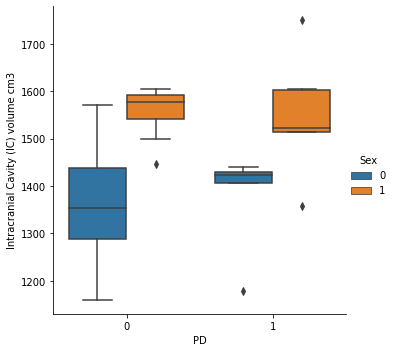

In [14]:
sns.catplot(x='PD', y='Intracranial Cavity (IC) volume cm3', hue='Sex',data=df, kind='box')

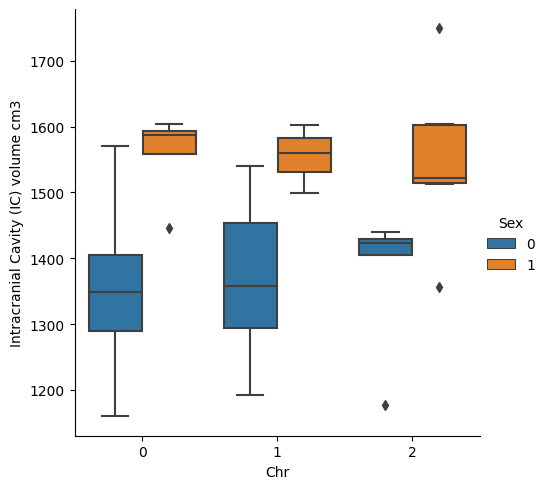

In [15]:
sns.catplot(x='Chr', y='Intracranial Cavity (IC) volume cm3', hue='Sex',data=df, kind='box')

In [60]:
#stats.spearmanr(pd, sleep, axis=1)

In [63]:
#sns.lmplot(x='Grey Matter (GM) volume cm3', y='Intracranial Cavity (IC) volume cm3',hue='Age', row='PD', data=df)

In [64]:
#stats.pearsonr(pd, sleep)

In [68]:
#df.corr()

In [67]:
df.corrwith(df["PD"], axis=0, drop=False, method='pearson')

Subjectt                   -0.835790
Sex                         0.258775
Age                         0.842348
PD                          1.000000
Chr                         0.882670
                              ...   
PO right thickness mm       0.380477
PO right thickness norm.   -0.219277
PO left thickness mm       -0.177737
PO left thickness norm.    -0.124452
PO thickness asymmetry      0.091678
Length: 933, dtype: float64

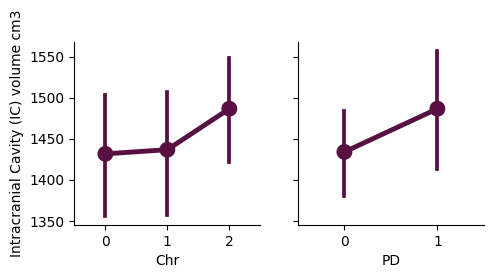

In [16]:
g = sns.PairGrid(df, y_vars='Intracranial Cavity (IC) volume cm3',x_vars=['Chr','PD'])
g.map(sns.pointplot, scale=1.3, errwidt=4, color='xkcd:plum')

In [16]:
#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')